In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import emoji as emoji_package
from wordcloud import WordCloud
from palettable.colorbrewer.qualitative import Dark2_8

In [10]:
import sys
sys.path.insert(0,'..')  # Needed to import package in parent dir, remove this if you pip installed the package
from utils.whatsapp import helper      # Helper to prepare the data
from utils.whatsapp import general     # General statistics
from utils.whatsapp import tf_idf      # To calculate TF-IDF
from utils.whatsapp import emoji       # To analyze emoji use
from utils.whatsapp import topic       # Topic modelling and summarization
from utils.whatsapp import sentiment   # Sentiment Analysis
from utils.whatsapp import wordcloud   # Create Word Clouds\

from utils.colors   import colors      # Frequent Color Visualization

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
df = helper.import_data('../data/WhatsApp chat with Prachi.txt')

In [12]:
df.shape

(2631, 3)

In [13]:
df.head(10)

,index,Message_Raw,User
0,0,"27/02/19, 1:08 am - Messages and calls are end...",Messages and calls are end-to-end encrypted. N...
1,0,"03/03/19, 9:08 pm - Prachi😂😉: <Media omitted>\n",Prachi😂😉
2,1,"14/03/19, 12:46 pm - Prachi😂😉: Join me on Step...",Prachi😂😉
3,2,"31/05/19, 11:11 am - Prachi😂😉: But the answer ...",Prachi😂😉
4,3,"31/05/19, 11:11 am - Prachi😂😉: You lost\n",Prachi😂😉
5,4,"31/05/19, 11:12 am - Prachi😂😉: I now but the a...",Prachi😂😉
6,5,"31/05/19, 11:12 am - Prachi😂😉: So that means y...",Prachi😂😉
7,6,"31/05/19, 11:13 am - Prachi😂😉: You lost bro\n",Prachi😂😉
8,7,"31/05/19, 11:14 am - Prachi😂😉: You lost\n",Prachi😂😉
9,8,"31/05/19, 11:15 am - Prachi😂😉: Jayu aap\n",Prachi😂😉


In [14]:
df.columns

Index(['index', 'Message_Raw', 'User'], dtype='object')

In [15]:
df["Message_Raw"][:30]

0     27/02/19, 1:08 am - Messages and calls are end...
1       03/03/19, 9:08 pm - Prachi😂😉: <Media omitted>\n
2     14/03/19, 12:46 pm - Prachi😂😉: Join me on Step...
3     31/05/19, 11:11 am - Prachi😂😉: But the answer ...
4             31/05/19, 11:11 am - Prachi😂😉: You lost\n
5     31/05/19, 11:12 am - Prachi😂😉: I now but the a...
6     31/05/19, 11:12 am - Prachi😂😉: So that means y...
7         31/05/19, 11:13 am - Prachi😂😉: You lost bro\n
8             31/05/19, 11:14 am - Prachi😂😉: You lost\n
9             31/05/19, 11:15 am - Prachi😂😉: Jayu aap\n
10    31/05/19, 11:15 am - Prachi😂😉: Gusa karne lagt...
11             31/05/19, 11:18 am - Prachi😂😉: Hamesha\n
12         31/05/19, 11:18 am - Prachi😂😉: Yeh kya hai\n
13      23/06/19, 5:50 pm - Prachi😂😉: <Media omitted>\n
14                04/07/19, 12:42 am - Prachi😂😉: True\n
15        28/07/19, 2:00 am - Prachi😂😉: Sahi baat hai\n
16      19/08/19, 2:09 pm - Prachi😂😉: <Media omitted>\n
17      19/08/19, 2:09 pm - Prachi😂😉: <Media omi

In [16]:
df = helper.preprocess_data(df)

In [17]:
df.head(10)

,index,Message_Raw,User,Message_Clean,Message_Only_Text,Date,Hour,Day_of_Week
1506,28,"01/11/19, 11:07 pm - Hemang: Oue\n",Hemang,Oue,oue,2019-01-11 23:07:00,23,4
1507,29,"01/11/19, 11:08 pm - Hemang: Google pay pe Kya...",Hemang,Google pay pe Kya Baki hai?,google pay pe kya baki hai,2019-01-11 23:08:00,23,4
29,28,"01/11/19, 11:10 pm - Prachi😂😉: Rangoli baki hai\n",Prachi😂😉,Rangoli baki hai,rangoli baki hai,2019-01-11 23:10:00,23,4
1508,30,"01/11/19, 11:10 pm - Hemang: Same🤣\n",Hemang,Same🤣,same,2019-01-11 23:10:00,23,4
31,30,"01/11/19, 11:11 pm - Prachi😂😉: Mil he nahi Rah...",Prachi😂😉,Mil he nahi Raha hai vo,mil he nahi raha hai vo,2019-01-11 23:11:00,23,4
30,29,"01/11/19, 11:11 pm - Prachi😂😉: Sabka Wahi baki...",Prachi😂😉,Sabka Wahi baki hai,sabka wahi baki hai,2019-01-11 23:11:00,23,4
1489,11,"03/08/19, 12:40 am - Hemang: There will always...",Hemang,There will always be a reason why you meet peo...,there will always be a reason why you meet peo...,2019-03-08 00:40:00,0,4
2,1,"14/03/19, 12:46 pm - Prachi😂😉: Join me on Step...",Prachi😂😉,"Join me on StepSetGo, an application that rewa...",join me on stepsetgo an application that rewar...,2019-03-14 12:46:00,12,3
1486,8,"04/07/19, 12:17 am - Hemang: When you lose som...",Hemang,"When you lose something, don’t think of it as ...",when you lose something dont think of it as a ...,2019-04-07 00:17:00,0,6
14,13,"04/07/19, 12:42 am - Prachi😂😉: True\n",Prachi😂😉,True,true,2019-04-07 00:42:00,0,6


In [18]:
df.columns

Index(['index', 'Message_Raw', 'User', 'Message_Clean', 'Message_Only_Text',
       'Date', 'Hour', 'Day_of_Week'],
      dtype='object')

In [19]:
df["Message_Raw"][:30]

1506                   01/11/19, 11:07 pm - Hemang: Oue\n
1507    01/11/19, 11:08 pm - Hemang: Google pay pe Kya...
29      01/11/19, 11:10 pm - Prachi😂😉: Rangoli baki hai\n
1508                 01/11/19, 11:10 pm - Hemang: Same🤣\n
31      01/11/19, 11:11 pm - Prachi😂😉: Mil he nahi Rah...
30      01/11/19, 11:11 pm - Prachi😂😉: Sabka Wahi baki...
1489    03/08/19, 12:40 am - Hemang: There will always...
2       14/03/19, 12:46 pm - Prachi😂😉: Join me on Step...
1486    04/07/19, 12:17 am - Hemang: When you lose som...
14                  04/07/19, 12:42 am - Prachi😂😉: True\n
1478                    31/05/19, 11:08 am - Hemang: No\n
4               31/05/19, 11:11 am - Prachi😂😉: You lost\n
3       31/05/19, 11:11 am - Prachi😂😉: But the answer ...
1479    31/05/19, 11:11 am - Hemang: Nope answer can b...
6       31/05/19, 11:12 am - Prachi😂😉: So that means y...
5       31/05/19, 11:12 am - Prachi😂😉: I now but the a...
1480                 31/05/19, 11:13 am - Hemang: Ja be\n
1481         3

In [20]:
df['Message_Clean'][:]

1506                                                Oue
1507                        Google pay pe Kya Baki hai?
29                                     Rangoli baki hai
1508                                              Same🤣
31                              Mil he nahi Raha hai vo
                             ...                       
1466                                               Nice
1467    🙄 aur abhi toh gussa aata hai kuch dikha do toh
2620              Chrge tha phone main woh krne k liye?
1468      Ha chal charger bhi hota toh aisa he bolte ho
2621                                                 Ok
Name: Message_Clean, Length: 2450, dtype: object

In [21]:
#
if True:
    user_labels = {old: new for old, new in zip(sorted(df.User.unique()), ['Prachi', 'Hemang'])}
    df.User = df.User.map(user_labels)

In [22]:
#
general.print_users(df)

#############
##  Users  ##
#############

Prachi
Hemang


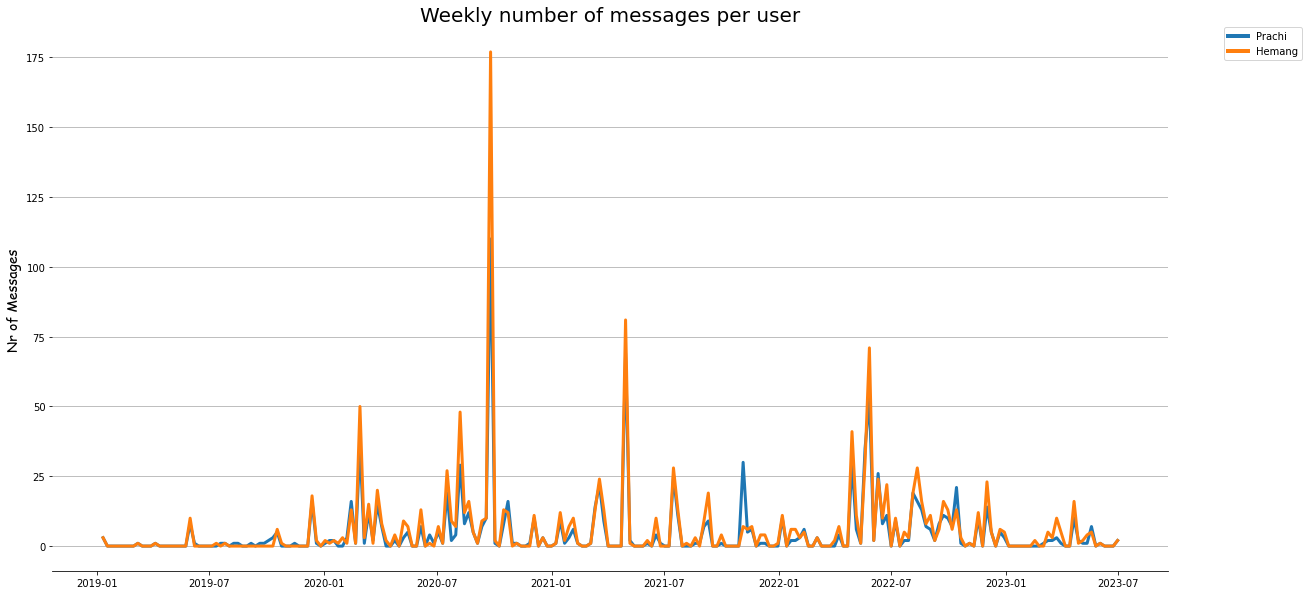

In [23]:
#Users
general.plot_messages(df, colors=None, trendline=False, savefig=False, dpi=100)

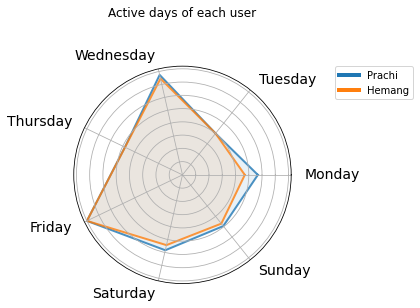

In [24]:
#Active Moments
general.plot_day_spider(df, colors=None, savefig=False, dpi=100)

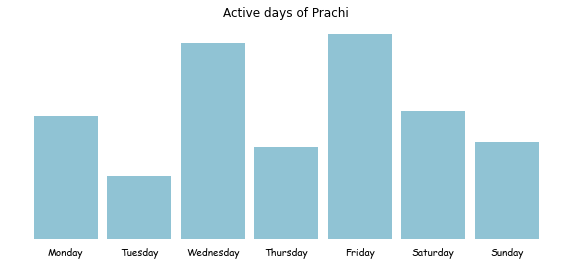

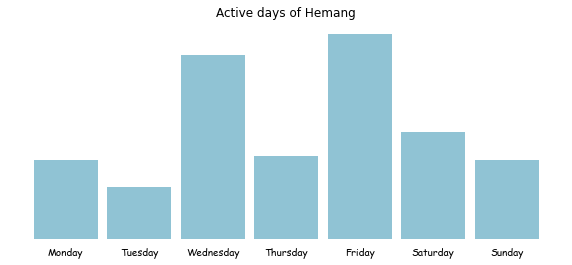

In [25]:
#Weekly Activity
general.plot_active_days(df, savefig=False, dpi=100, user='Prachi')
general.plot_active_days(df, savefig=False, dpi=100, user='Hemang')

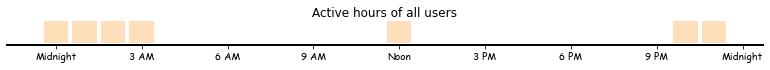

In [26]:
#Hourly Activity
general.plot_active_hours(df, color='#ffdfba', savefig=False, dpi=100, user='All')

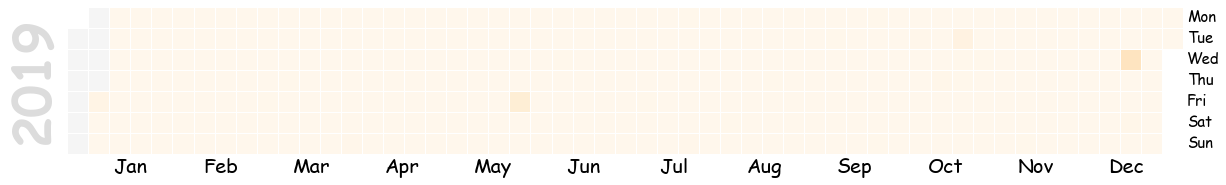

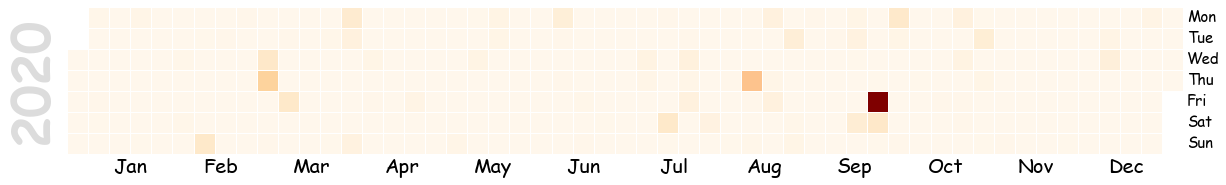

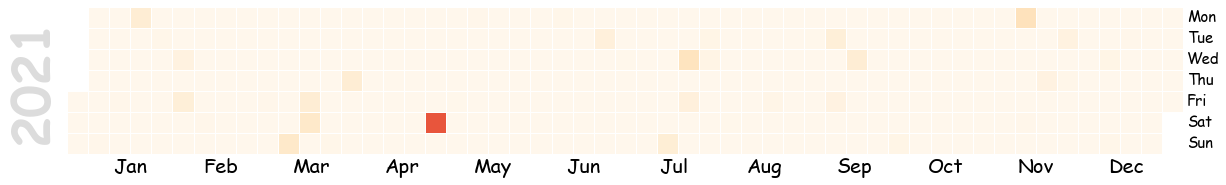

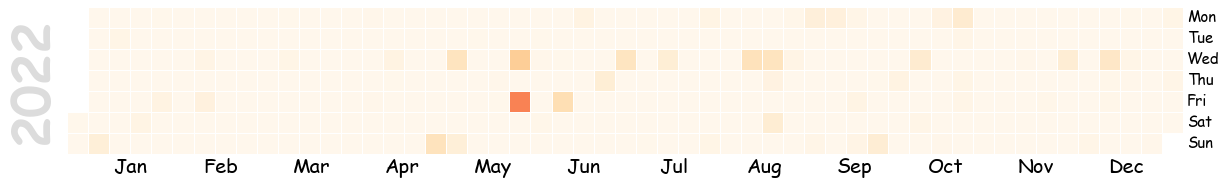

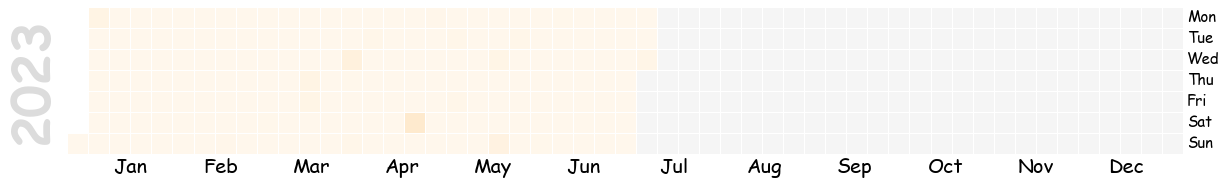

In [27]:
#Calander Map of the chat 
import pandas as pd
years = set(pd.DatetimeIndex(df.Date.values).year)

for year in years:
    general.calendar_plot(df, year=year, how='count', column='index')

In [28]:
#Average and summeries of it
general.print_stats(df, love=True)  #True means how many positive chat are there if its false than it will show the negative ones

##########################
##  Number of Messages  ##
##########################

1072	Prachi
1378	Hemang

#######################
##  Number of Words  ##
#######################

4524	Prachi
4678	Hemang

#########################
##  Messages per hour  ##
#########################

Prachi:	0.02730931879553676
Hemang:	0.03510470270545677

################################
##  Avg nr Words per Message  ##
################################

Prachi: 4.22
Hemang: 3.39

#############################
##  Avg length of Message  ##
#############################

Prachi: 19.59
Hemang: 14.68

##############################
##  Highscore Day per User  ##
##############################

Prachi
Messages: 	82
Day: 		2020-09-25

Hemang
Messages: 	145
Day: 		2020-09-25

########################################
##  How often user said "I love you"  ##
########################################

Prachi:                       3
Hemang:                       1


In [29]:
#Response time
general.print_timing(df)

#####################################
##  Avg. Response Time in Minutes  ##
#####################################

Prachi:                       22.45
Hemang:                       20.42

##############################
##  Nr. Initiated Messages  ##
##############################

Prachi:                       64		(5.97% of all messages)
Hemang:                       38		(2.76% of all messages)


In [30]:
#Creating count vector to identiy the counts
counts = tf_idf.count_words_per_user(df, sentence_column="Message_Only_Text", user_column="User")
counts = tf_idf.remove_stopwords(counts, language="english", column="Word")

In [31]:
#How mang time we said love
counts.loc[counts['Word']=="love"]

,Word,Prachi,Hemang
223,love,6,10


In [32]:
#How mang time we said sorry
counts.loc[counts['Word']=="sorry"]

,Word,Prachi,Hemang
504,sorry,2,7


In [33]:
#How mang time we said nice
counts.loc[counts['Word']=="nice"]

,Word,Prachi,Hemang
483,nice,2,5


In [34]:
#How mang time we said nimesh
counts.loc[counts['Word']=="nimesh"]

,Word,Prachi,Hemang
236,nimesh,4,5


In [35]:
#How mang time we said did
counts.loc[counts['Word']=="didi"]

,Word,Prachi,Hemang
107,didi,2,3


In [36]:
#How mang time we said okay
counts.loc[counts['Word']=="okay"]

,Word,Prachi,Hemang
131,okay,21,32


In [37]:
#How mang time we said bye
counts.loc[counts['Word']=="bye"]

,Word,Prachi,Hemang
442,bye,6,6


In [38]:
#How mang time we said night
counts.loc[counts['Word']=="night"]

,Word,Prachi,Hemang
300,night,10,9


In [39]:
#
unique_words = tf_idf.get_unique_words(counts, df, version = 'C')

In [40]:
unique_words

,Word,Prachi,Hemang,Prachi_TF_IDF,Hemang_TF_IDF,Prachi_Unique,Hemang_Unique
1,google,1,0,15.610167,7.805956,1.999776,0.500056
2,pay,2,0,21.334349,7.112622,2.999506,0.333388
3,pe,11,7,58.963220,39.309103,1.499989,0.666672
4,kya,25,22,102.797345,90.936072,1.130435,0.884615
5,baki,5,3,34.348230,22.899157,1.499978,0.666676
...,...,...,...,...,...,...,...
1927,pahoch,1,0,15.610167,7.805956,1.999776,0.500056
1928,karoo,1,0,15.610167,7.805956,1.999776,0.500056
1929,shipped,1,0,15.610167,7.805956,1.999776,0.500056
1930,krne,1,0,15.610167,7.805956,1.999776,0.500056


In [41]:
#users for unique words
tf_idf.print_users(df)

#############
##  Users  ##
#############

Prachi
Hemang


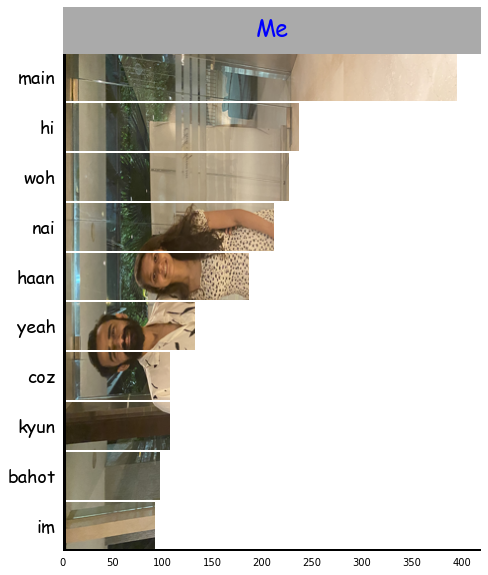

In [46]:
#
tf_idf.plot_unique_words(unique_words, 
                         user='Prachi', 
                         image_path='../images/prachi.JPG', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="Me", 
                         title_color="Blue", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)

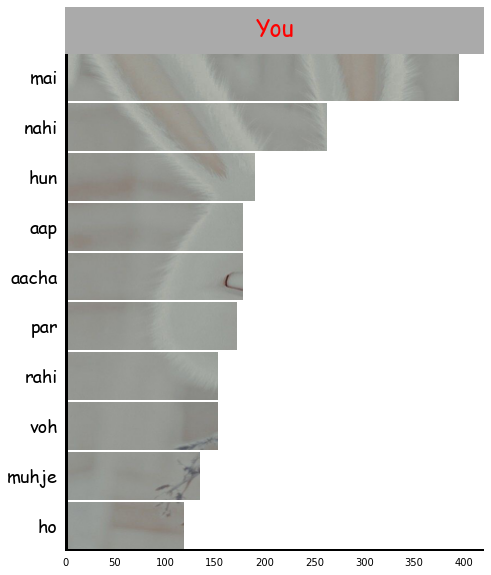

In [49]:
#
tf_idf.plot_unique_words(unique_words, 
                         user="Hemang", 
                         image_path='../images/yes.JPG', # use '../images/mask.png' to use the standard image
                         image_url=None, 
                         title="You", 
                         title_color="Red", 
                         title_background='#AAAAAA', 
                         width=400, 
                         height=500)